## Import packages

In [1]:
import pandas as pd
import plotly
from chart_studio import plotly
from plotnine import *
# import MySQLdb
import fecfile
import requests
import time
# import sqlalchemy
#import pickle
import datetime
import numpy as np

## Data dictionary

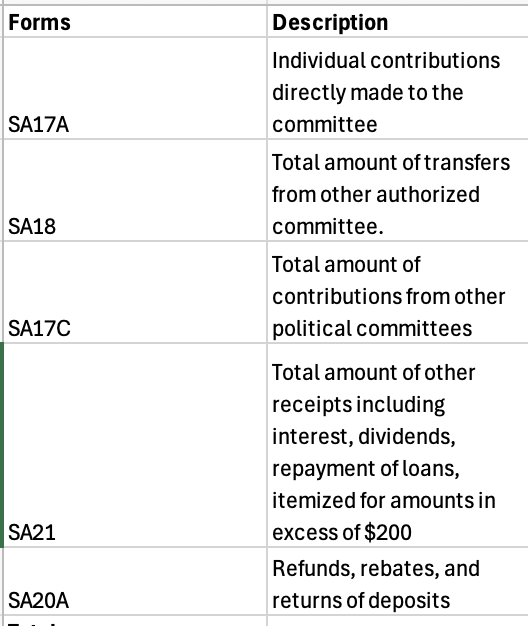

## Get file number for F3PN for each campaign

F3PN is for contributions and expenses.

- Kamala Harris for President - 1805248
- Donald J. Trump for President 2024, Inc. - 1805185

In [2]:
filing = fecfile.from_http('1805185') #file no for Kamala
# filing

## Schedule A: Contributions

Schedule B is for expenses

In [3]:
df = pd.DataFrame(filing['itemizations']['Schedule A'])
df.contribution_date=pd.to_datetime(df.contribution_date)
df.contribution_amount=pd.to_numeric(df.contribution_amount)
df[df.memo_code=='X'].to_clipboard(index=False)
# pd.set_option('display.max_columns', None)
df

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.118143196,,,PAC,WINRED,,,,...,,,,,,,,X,,
1,SA17A,C00828541,SA17A.118147923,SA17A.118143196,SA17A,IND,,STEWART,SUSAN,,...,,,,,,,,,CHARGEBACK,
2,SA17A,C00828541,SA17A.118144806,,,PAC,WINRED,,,,...,,,,,,,,X,,
3,SA17A,C00828541,SA17A.118027135,SA17A.118144806,SA17A,IND,,EAGAN,LARRY,,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.118027132,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494382,SA21,C00828541,SA21.121518541.4,,,IND,,PEARSON,PAUL,,...,,,,,,,,X,,
494383,SA21,C00828541,SA21.118948462.4,,,IND,,SMITH,NOEL,G,...,,,,,,,,X,,
494384,SA21,C00828541,SA21.119187579.4,,,IND,,TEAGUE,THOMAS,L,...,,,,,,,,X,,
494385,SA21,C00828541,SA21.120754377.4,,,IND,,THOMAS,GARY,,...,,,,,,,,X,,


In [4]:
df.form_type.value_counts()

SA18     465234
SA17A     29123
SA21         17
SA20A        11
SA17C         2
Name: form_type, dtype: int64

## SA17A: direct contributions

In [5]:
sa17a= df[df.form_type=='SA17A']
sa17a

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.118143196,,,PAC,WINRED,,,,...,,,,,,,,X,,
1,SA17A,C00828541,SA17A.118147923,SA17A.118143196,SA17A,IND,,STEWART,SUSAN,,...,,,,,,,,,CHARGEBACK,
2,SA17A,C00828541,SA17A.118144806,,,PAC,WINRED,,,,...,,,,,,,,X,,
3,SA17A,C00828541,SA17A.118027135,SA17A.118144806,SA17A,IND,,EAGAN,LARRY,,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.118027132,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29118,SA17A,C00828541,SA17A.118995517,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,
29119,SA17A,C00828541,SA17A.118949488,,,IND,,ZYCH,ANDREW,,...,,,,,,,,,,
29120,SA17A,C00828541,SA17A.119156522,,,IND,,ZYLSTRA,WILLIAM,G,...,,,,,,,,,,
29121,SA17A,C00828541,SA17A.118998329,,,IND,,ZYNN,NANCY,C,...,,,,,,,,,,


### SA17A: removing the memo code

In [6]:
sa17a_memo = sa17a[sa17a.memo_code!='X']
sa17a_memo

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
1,SA17A,C00828541,SA17A.118147923,SA17A.118143196,SA17A,IND,,STEWART,SUSAN,,...,,,,,,,,,CHARGEBACK,
3,SA17A,C00828541,SA17A.118027135,SA17A.118144806,SA17A,IND,,EAGAN,LARRY,,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.118027132,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
5,SA17A,C00828541,SA17A.118027133,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
6,SA17A,C00828541,SA17A.118027134,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29118,SA17A,C00828541,SA17A.118995517,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,
29119,SA17A,C00828541,SA17A.118949488,,,IND,,ZYCH,ANDREW,,...,,,,,,,,,,
29120,SA17A,C00828541,SA17A.119156522,,,IND,,ZYLSTRA,WILLIAM,G,...,,,,,,,,,,
29121,SA17A,C00828541,SA17A.118998329,,,IND,,ZYNN,NANCY,C,...,,,,,,,,,,


In [7]:
sa17a_memo.contribution_amount.sum()

4421206.57

## Check: Just the memo codes

In [8]:
memo_x= sa17a[sa17a.memo_code=='X']
memo_x

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.118143196,,,PAC,WINRED,,,,...,,,,,,,,X,,
2,SA17A,C00828541,SA17A.118144806,,,PAC,WINRED,,,,...,,,,,,,,X,,
30,SA17A,C00828541,SA17A.118294251,,,PAC,WINRED,,,,...,,,,,,,,X,,
92,SA17A,C00828541,SA17A.118303052.1,SA17A.118294251,SA17A,IND,,BARTELS,DOUG,W,...,,,,,,,,X,,
93,SA17A,C00828541,SA17A.118303052.2,SA17A.118294251,SA17A,IND,,BARTELS,DOUG,W,...,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28981,SA17A,C00828541,SA17A.118353031.1,,,IND,,ZAMZOW,JAMES,B,...,,,,,,,,X,,
28982,SA17A,C00828541,SA17A.118353031.2,,,IND,,ZAMZOW,JAMES,B,...,,,,,,,,X,,
29077,SA17A,C00828541,SA17A.121784429.1,,,IND,,ZINGRE,CARA,K,...,,,,,,,,X,,
29079,SA17A,C00828541,SA17A.121784897.1,,,IND,,ZINGRE,CARA,K,...,,,,,,,,X,,


In [9]:
memo_x.contribution_amount.sum()

119789.10999999999

## Filter all individual contributions in SA17A

In [10]:
sa17a_IND = sa17a[sa17a.entity_type=='IND'].reset_index(drop=True)
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00828541,SA17A.118147923,SA17A.118143196,SA17A,IND,,STEWART,SUSAN,,...,,,,,,,,,CHARGEBACK,
1,SA17A,C00828541,SA17A.118027135,SA17A.118144806,SA17A,IND,,EAGAN,LARRY,,...,,,,,,,,,CHARGEBACK,
2,SA17A,C00828541,SA17A.118027132,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
3,SA17A,C00828541,SA17A.118027133,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
4,SA17A,C00828541,SA17A.118027134,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,,CHARGEBACK,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,SA17A,C00828541,SA17A.118995517,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,
29096,SA17A,C00828541,SA17A.118949488,,,IND,,ZYCH,ANDREW,,...,,,,,,,,,,
29097,SA17A,C00828541,SA17A.119156522,,,IND,,ZYLSTRA,WILLIAM,G,...,,,,,,,,,,
29098,SA17A,C00828541,SA17A.118998329,,,IND,,ZYNN,NANCY,C,...,,,,,,,,,,


In [11]:
sa17a_IND.contribution_amount.sum()

4396073.5200000005

In [12]:
def categorize_amount(amount):
    if 1 <= amount <= 24:
        return '1-24'
    if 25 <= amount <= 49:
        return '25-49'
    elif 50 <= amount <= 74:
        return '50-74'
    elif 75 <= amount <= 99:
        return '75-99'
    elif 100 <= amount <= 149:
        return '100-149'
    elif 150 <= amount <= 199:
        return '150-199'
    elif amount >= 200:
        return '200 and over'
    else:
        return 'Below 1'

In [13]:
sa17a_IND['range'] = sa17a_IND['contribution_amount'].apply(categorize_amount)
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00828541,SA17A.118147923,SA17A.118143196,SA17A,IND,,STEWART,SUSAN,,...,,,,,,,,CHARGEBACK,,Below 1
1,SA17A,C00828541,SA17A.118027135,SA17A.118144806,SA17A,IND,,EAGAN,LARRY,,...,,,,,,,,CHARGEBACK,,Below 1
2,SA17A,C00828541,SA17A.118027132,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,CHARGEBACK,,Below 1
3,SA17A,C00828541,SA17A.118027133,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,CHARGEBACK,,Below 1
4,SA17A,C00828541,SA17A.118027134,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,...,,,,,,,,CHARGEBACK,,Below 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29095,SA17A,C00828541,SA17A.118995517,,,IND,,ZWINK,GLADY,V,...,,,,,,,,,,100-149
29096,SA17A,C00828541,SA17A.118949488,,,IND,,ZYCH,ANDREW,,...,,,,,,,,,,100-149
29097,SA17A,C00828541,SA17A.119156522,,,IND,,ZYLSTRA,WILLIAM,G,...,,,,,,,,,,25-49
29098,SA17A,C00828541,SA17A.118998329,,,IND,,ZYNN,NANCY,C,...,,,,,,,,,,200 and over


In [14]:
categories= sa17a_IND.groupby('range').contribution_amount.sum()
categories

range
1-24              70250.92
100-149          520620.28
150-199          110604.92
200 and over    3692886.51
25-49            100374.69
50-74            139764.64
75-99             40143.06
Below 1         -278571.50
Name: contribution_amount, dtype: float64

In [15]:
categories_by_date = sa17a_IND.groupby('range').resample('D', on='contribution_date').contribution_amount.sum().to_frame()
categories_by_date

contribution_amount
range   contribution_date                             
1-24    2024-05-25 00:00:00-04:00                 9.00
        2024-05-26 00:00:00-04:00                 0.00
        2024-05-27 00:00:00-04:00                 0.00
        2024-05-28 00:00:00-04:00                 0.00
        2024-05-29 00:00:00-04:00                 0.00
...                                                ...
Below 1 2024-06-26 00:00:00-04:00              -401.20
        2024-06-27 00:00:00-04:00             -4432.70
        2024-06-28 00:00:00-04:00             -1731.78
        2024-06-29 00:00:00-04:00               -69.04
        2024-06-30 00:00:00-04:00             -1278.82

[261 rows x 1 columns]

In [16]:
categories_by_date.to_csv('dated contributions in buckets_trump.csv')

In [17]:
sa17a_IND_200_wide = sa17a_IND.pivot_table(columns= "transaction_id", index="contribution_date", values='contribution_amount', aggfunc='sum', fill_value='0', dropna=False).reset_index()
sa17a_IND_200_wide.head(10)

transaction_id,contribution_date,SA11AI.119159078.1,SA17A.116373961,SA17A.116373961.1,SA17A.116373961.2,SA17A.117068991,SA17A.117068991.1,SA17A.117068991.2,SA17A.117390545,SA17A.117390545.1,...,SA17A.122284693,SA17A.122284696,SA17A.122284699,SA17A.122284701,SA17A.122284702,SA17A.122284703,SA17A.122284705,SA17A.122284707,SA17A.122284708,SA17A.122575828
0,2024-05-17 00:00:00-04:00,0,100.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-05-25 00:00:00-04:00,0,0,0,0,9.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-05-29 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-05-31 00:00:00-04:00,0,0,0,0,0,0,0,100.0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-06-01 00:00:00-04:00,0,0,0,0,0,-9.0,9.0,0,-23.14,...,0,0,0,0,0,0,0,0,0,0
5,2024-06-02 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2024-06-03 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2024-06-04 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2024-06-05 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2024-06-06 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
sa17a_IND_200_long = pd.melt(sa17a_IND_200_wide, id_vars=['contribution_date'], value_name='contribution_amount', \
                   var_name='transaction_id')
sa17a_IND_200_long

,contribution_date,transaction_id,contribution_amount
0,2024-05-17 00:00:00-04:00,SA11AI.119159078.1,0
1,2024-05-25 00:00:00-04:00,SA11AI.119159078.1,0
2,2024-05-29 00:00:00-04:00,SA11AI.119159078.1,0
3,2024-05-31 00:00:00-04:00,SA11AI.119159078.1,0
4,2024-06-01 00:00:00-04:00,SA11AI.119159078.1,0
...,...,...,...
989395,2024-06-26 00:00:00-04:00,SA17A.122575828,0
989396,2024-06-27 00:00:00-04:00,SA17A.122575828,0
989397,2024-06-28 00:00:00-04:00,SA17A.122575828,0
989398,2024-06-29 00:00:00-04:00,SA17A.122575828,0


In [19]:
sa17a_IND_200_long.contribution_amount = sa17a_IND_200_long.contribution_amount.astype(float)

In [20]:
sa17a_IND_200_long = sa17a_IND_200_long[sa17a_IND_200_long.contribution_amount>=1]
sa17a_IND_200_long

,contribution_date,transaction_id,contribution_amount
34,2024-05-17 00:00:00-04:00,SA17A.116373961,100.0
122,2024-06-17 00:00:00-04:00,SA17A.116373961.2,100.0
137,2024-05-25 00:00:00-04:00,SA17A.117068991,9.0
208,2024-06-01 00:00:00-04:00,SA17A.117068991.2,9.0
241,2024-05-31 00:00:00-04:00,SA17A.117390545,100.0
...,...,...,...
980185,2024-06-30 00:00:00-04:00,SA17A.122284273,1.0
980218,2024-06-29 00:00:00-04:00,SA17A.122284274,1.0
980252,2024-06-29 00:00:00-04:00,SA17A.122284275,1.0
980286,2024-06-29 00:00:00-04:00,SA17A.122284276,1.0


In [21]:
# (
#     ggplot(sa17a_IND_200_long, aes('contribution_date','contribution_amount')) +
#            geom_point(color="blue") +
#            theme(figure_size=(14,8)) +
#            theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
#            labs(x= "Date", y="Contributions", title="Individual contributions")
# )

## Simple chart of SA17A

In [22]:
sa17a_IND_chart = sa17a_IND.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa17a_IND_chart

,contribution_date,contribution_amount
0,2024-05-17 00:00:00-04:00,100.00
1,2024-05-18 00:00:00-04:00,0.00
2,2024-05-19 00:00:00-04:00,0.00
3,2024-05-20 00:00:00-04:00,0.00
4,2024-05-21 00:00:00-04:00,0.00
5,2024-05-22 00:00:00-04:00,0.00
6,2024-05-23 00:00:00-04:00,0.00
7,2024-05-24 00:00:00-04:00,0.00
8,2024-05-25 00:00:00-04:00,9.00
9,2024-05-26 00:00:00-04:00,0.00


In [23]:
sa17a_IND_chart = sa17a_IND_chart.sort_values('contribution_date')
sa17a_IND_chart = sa17a_IND_chart[sa17a_IND_chart.contribution_date>='2024-06-01'].reset_index(drop=True) #only June
sa17a_IND_chart

,contribution_date,contribution_amount
0,2024-06-01 00:00:00-04:00,6176.32
1,2024-06-02 00:00:00-04:00,4313.40
2,2024-06-03 00:00:00-04:00,205501.24
3,2024-06-04 00:00:00-04:00,125326.88
4,2024-06-05 00:00:00-04:00,139133.96
5,2024-06-06 00:00:00-04:00,172638.24
6,2024-06-07 00:00:00-04:00,344719.06
7,2024-06-08 00:00:00-04:00,2350.24
8,2024-06-09 00:00:00-04:00,1529.73
9,2024-06-10 00:00:00-04:00,213603.38


In [24]:
# sa17a_IND_chart.to_csv('direct_cumulative.csv', index=False)

<AxesSubplot:title={'center':'Individual direct contributions to Biden campaign'}, xlabel='contribution_date'>

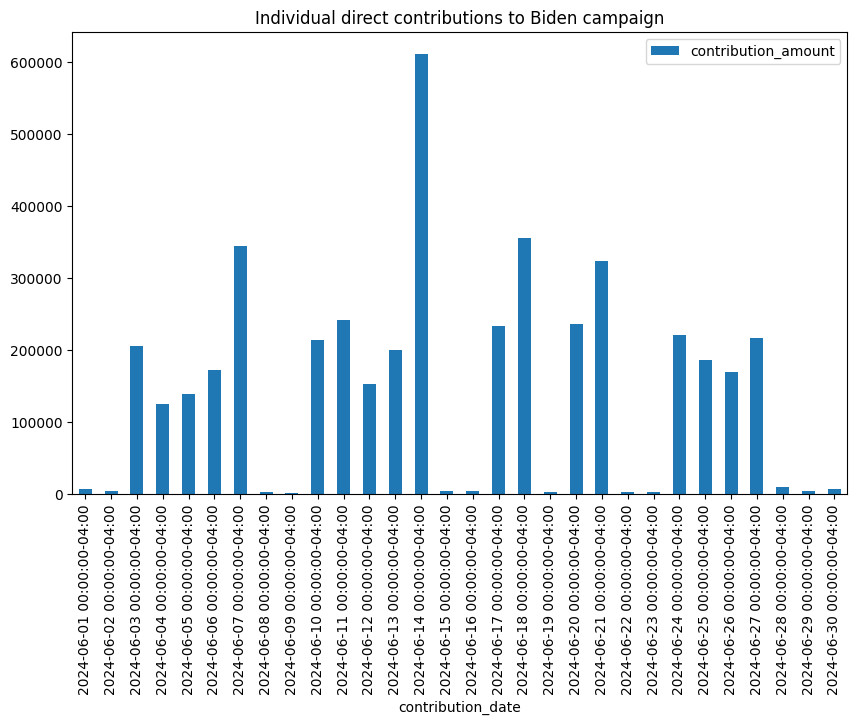

In [25]:
sa17a_IND_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title='Individual direct contributions to Biden campaign')

## SA18: transfers from authorized committee

In [29]:
sa18= df[df.form_type=='SA18']
pd.set_option('display.max_columns', 50)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
29125,SA18,C00828541,SA18.122675616,,,COM,"TRUMP NATIONAL COMMITTEE JFC, INC.",,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,P2024,,2024-06-30 00:00:00-04:00,13281091.40,73128650.80,JFC TRANSFER: SEE ATTRIBUTIONS ABOVE ITEMIZATI...,,,C00873893,"TRUMP NATIONAL COMMITTEE JFC, INC.",,,,,,,,,,,,,,,,,,
29126,SA18,C00828541,SA18.124035166,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-05 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
29127,SA18,C00828541,SA18.124035167,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-30 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
29128,SA18,C00828541,SA18.124035168,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-27 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
29129,SA18,C00828541,SA18.123761095,SA18.122675616,SA18,IND,,A,BRUCE,,,,2109 NE 44TH ST,,FORT LAUDERDALE,FL,33308,P2024,,2024-06-28 00:00:00-04:00,270.00,270.00,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494354,SA18,C00828541,SA18.123516859,SA18.122675616,SA18,IND,,ZYSKOWSKI,MARK,,,,22 W SHORE TRL,,STOCKHOLM,NJ,07460,P2024,,2024-06-29 00:00:00-04:00,93.69,281.07,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SECURITY HEADQUARTERS,ELECTRONICS OWNER,,,,,,,,,,,,,,,,,,X,,
494355,SA18,C00828541,SA18.124049009,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-12 00:00:00-04:00,1.13,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
494356,SA18,C00828541,SA18.124049010,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-20 00:00:00-04:00,42.30,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
494357,SA18,C00828541,SA18.123208606,SA18.122675616,SA18,IND,,ZYWICKI,EDWARD,,,,5543 ACORN LN,,STERLING HEIGHTS,MI,48314,P2024,,2024-06-02 00:00:00-04:00,18.96,350.91,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",STELLANTIS,ENGINEER,,,,,,,,,,,,,,,,,,X,,


In [30]:
sa18= sa18.reset_index(drop=True)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA18,C00828541,SA18.122675616,,,COM,"TRUMP NATIONAL COMMITTEE JFC, INC.",,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,P2024,,2024-06-30 00:00:00-04:00,13281091.40,73128650.80,JFC TRANSFER: SEE ATTRIBUTIONS ABOVE ITEMIZATI...,,,C00873893,"TRUMP NATIONAL COMMITTEE JFC, INC.",,,,,,,,,,,,,,,,,,
1,SA18,C00828541,SA18.124035166,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-05 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
2,SA18,C00828541,SA18.124035167,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-30 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
3,SA18,C00828541,SA18.124035168,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-27 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
4,SA18,C00828541,SA18.123761095,SA18.122675616,SA18,IND,,A,BRUCE,,,,2109 NE 44TH ST,,FORT LAUDERDALE,FL,33308,P2024,,2024-06-28 00:00:00-04:00,270.00,270.00,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465229,SA18,C00828541,SA18.123516859,SA18.122675616,SA18,IND,,ZYSKOWSKI,MARK,,,,22 W SHORE TRL,,STOCKHOLM,NJ,07460,P2024,,2024-06-29 00:00:00-04:00,93.69,281.07,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SECURITY HEADQUARTERS,ELECTRONICS OWNER,,,,,,,,,,,,,,,,,,X,,
465230,SA18,C00828541,SA18.124049009,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-12 00:00:00-04:00,1.13,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
465231,SA18,C00828541,SA18.124049010,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-20 00:00:00-04:00,42.30,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
465232,SA18,C00828541,SA18.123208606,SA18.122675616,SA18,IND,,ZYWICKI,EDWARD,,,,5543 ACORN LN,,STERLING HEIGHTS,MI,48314,P2024,,2024-06-02 00:00:00-04:00,18.96,350.91,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",STELLANTIS,ENGINEER,,,,,,,,,,,,,,,,,,X,,


In [32]:
sa18.entity_type.value_counts()

IND    465233
COM         1
Name: entity_type, dtype: int64

In [33]:
sa18= sa18.drop([0])
sa18
#dropped total at the top and unitemized contributions at the bottom
#may differ in succeeding reports.

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
1,SA18,C00828541,SA18.124035166,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-05 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
2,SA18,C00828541,SA18.124035167,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-30 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
3,SA18,C00828541,SA18.124035168,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-27 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,
4,SA18,C00828541,SA18.123761095,SA18.122675616,SA18,IND,,A,BRUCE,,,,2109 NE 44TH ST,,FORT LAUDERDALE,FL,33308,P2024,,2024-06-28 00:00:00-04:00,270.00,270.00,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
5,SA18,C00828541,SA18.123404801,SA18.122675616,SA18,IND,,A,BRUCE,,,,2906 OAK HILL DR,,ESCONDIDO,CA,92027,P2024,,2024-06-21 00:00:00-04:00,1.13,1080.03,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465229,SA18,C00828541,SA18.123516859,SA18.122675616,SA18,IND,,ZYSKOWSKI,MARK,,,,22 W SHORE TRL,,STOCKHOLM,NJ,07460,P2024,,2024-06-29 00:00:00-04:00,93.69,281.07,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SECURITY HEADQUARTERS,ELECTRONICS OWNER,,,,,,,,,,,,,,,,,,X,,
465230,SA18,C00828541,SA18.124049009,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-12 00:00:00-04:00,1.13,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
465231,SA18,C00828541,SA18.124049010,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-20 00:00:00-04:00,42.30,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
465232,SA18,C00828541,SA18.123208606,SA18.122675616,SA18,IND,,ZYWICKI,EDWARD,,,,5543 ACORN LN,,STERLING HEIGHTS,MI,48314,P2024,,2024-06-02 00:00:00-04:00,18.96,350.91,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",STELLANTIS,ENGINEER,,,,,,,,,,,,,,,,,,X,,


In [34]:
sa18.contribution_amount.sum()

20214818.88

In [36]:
# sa18.to_clipboard(index=False)

In [37]:
sa18['range'] = sa18['contribution_amount'].apply(categorize_amount)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
1,SA18,C00828541,SA18.124035166,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-05 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,,25-49
2,SA18,C00828541,SA18.124035167,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-30 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,,25-49
3,SA18,C00828541,SA18.124035168,SA18.122675616,SA18,IND,,A,BARBARA,,,,808 LONG TIMBER LN,,MONUMENT,CO,80132,P2024,,2024-06-27 00:00:00-04:00,44.04,353.04,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SELF-EMPLOYED,REAL ESTATE,,,,,,,,,,,,,,,,,,X,,,25-49
4,SA18,C00828541,SA18.123761095,SA18.122675616,SA18,IND,,A,BRUCE,,,,2109 NE 44TH ST,,FORT LAUDERDALE,FL,33308,P2024,,2024-06-28 00:00:00-04:00,270.00,270.00,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,200 and over
5,SA18,C00828541,SA18.123404801,SA18.122675616,SA18,IND,,A,BRUCE,,,,2906 OAK HILL DR,,ESCONDIDO,CA,92027,P2024,,2024-06-21 00:00:00-04:00,1.13,1080.03,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,1-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
465229,SA18,C00828541,SA18.123516859,SA18.122675616,SA18,IND,,ZYSKOWSKI,MARK,,,,22 W SHORE TRL,,STOCKHOLM,NJ,07460,P2024,,2024-06-29 00:00:00-04:00,93.69,281.07,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SECURITY HEADQUARTERS,ELECTRONICS OWNER,,,,,,,,,,,,,,,,,,X,,,75-99
465230,SA18,C00828541,SA18.124049009,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-12 00:00:00-04:00,1.13,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,1-24
465231,SA18,C00828541,SA18.124049010,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-20 00:00:00-04:00,42.30,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,25-49
465232,SA18,C00828541,SA18.123208606,SA18.122675616,SA18,IND,,ZYWICKI,EDWARD,,,,5543 ACORN LN,,STERLING HEIGHTS,MI,48314,P2024,,2024-06-02 00:00:00-04:00,18.96,350.91,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",STELLANTIS,ENGINEER,,,,,,,,,,,,,,,,,,X,,,1-24


In [38]:
categories_sa18= sa18.groupby('range').contribution_amount.sum()
categories_sa18

range
1-24             1717002.77
100-149           243257.02
150-199           455472.74
200 and over    11444860.65
25-49            2125267.21
50-74             266616.15
75-99            3865532.07
Below 1            96810.27
Name: contribution_amount, dtype: float64

## Simple chart for SA 18

In [39]:
sa18_chart = sa18.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa18_chart = sa18_chart.sort_values('contribution_date')
sa18_chart = sa18_chart[sa18_chart.contribution_date>='2024-06-01'].reset_index(drop=True) #only June
sa18_chart

,contribution_date,contribution_amount
0,2024-06-01 00:00:00-04:00,3006916.65
1,2024-06-02 00:00:00-04:00,1644388.68
2,2024-06-03 00:00:00-04:00,1563900.03
3,2024-06-04 00:00:00-04:00,786983.22
4,2024-06-05 00:00:00-04:00,624399.75
5,2024-06-06 00:00:00-04:00,532519.86
6,2024-06-07 00:00:00-04:00,900652.80
7,2024-06-08 00:00:00-04:00,260515.50
8,2024-06-09 00:00:00-04:00,275511.64
9,2024-06-10 00:00:00-04:00,437899.35


<AxesSubplot:title={'center':'Contributions via transfers to Biden campaign'}, xlabel='contribution_date'>

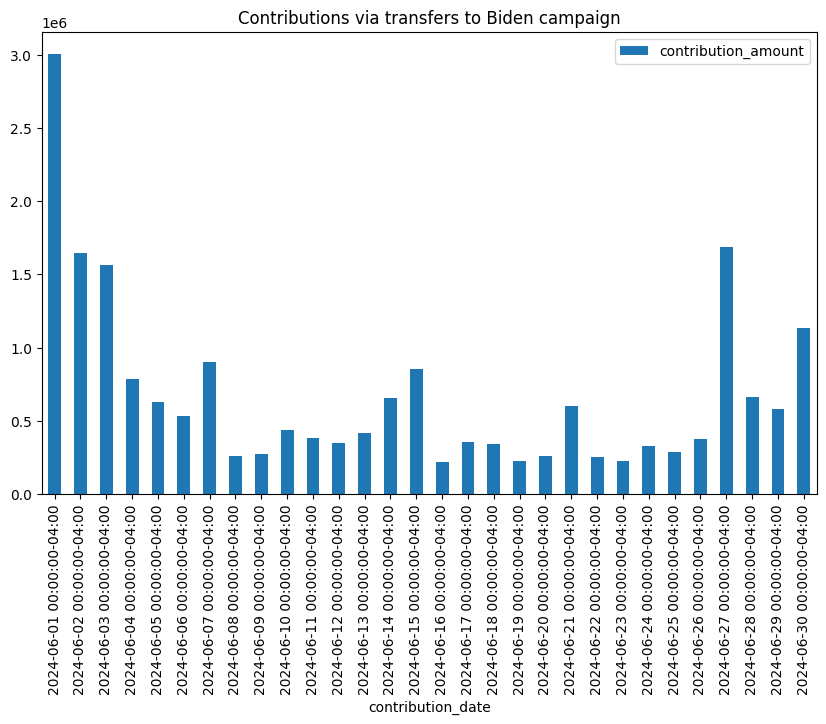

In [40]:
sa18_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title= 'Contributions via transfers to Biden campaign')

## SA17C

In [41]:
sa17c= df[df.form_type=='SA17C']
sa17c= sa17c.reset_index(drop=False)
sa17c

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,29123,SA17C,C00828541,SA17C.119144875,,,CCM,BRANDON GILL FOR TEXAS,,,,,,P.O. BOX 827,,ARLINGTON,VA,22216,P2024,,2024-06-13 00:00:00-04:00,2000.0,4000.0,,,,C00857359,BRANDON GILL FOR TEXAS,H4TX26149,GILL,BRANDON,,,,H,TX,26,,,,,,,,,
1,29124,SA17C,C00828541,SA17C.119144876,,,CCM,BRANDON GILL FOR TEXAS,,,,,,P.O. BOX 827,,ARLINGTON,VA,22216,G2024,,2024-06-13 00:00:00-04:00,2000.0,4000.0,,,,C00857359,BRANDON GILL FOR TEXAS,H4TX26149,GILL,BRANDON,,,,H,TX,26,,,,,,,,,


In [42]:
sa17c.contribution_amount.sum()

4000.0

## Group SA17A and SA18

In [43]:
grouped_contrib = pd.concat([sa17a_IND, sa18]).reset_index(drop=True)
grouped_contrib

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00828541,SA17A.118147923,SA17A.118143196,SA17A,IND,,STEWART,SUSAN,,,,1423 CORNERSVILLE HWY,,LEWISBURG,TN,37091,P2024,,2024-06-02 00:00:00-04:00,-1.01,380.37,EARMARKED THROUGH WINRED,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,,CHARGEBACK,,Below 1
1,SA17A,C00828541,SA17A.118027135,SA17A.118144806,SA17A,IND,,EAGAN,LARRY,,,,697 SCENIC RANCH CIR,,FAIRVIEW,TX,75069,P2024,,2024-06-02 00:00:00-04:00,-0.10,687.00,EARMARKED THROUGH WINRED,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,,CHARGEBACK,,Below 1
2,SA17A,C00828541,SA17A.118027132,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,,,10249 N MILITARY TRL,APT 207,PALM BEACH GARDENS,FL,33410,P2024,,2024-06-02 00:00:00-04:00,-21.07,157.10,EARMARKED THROUGH WINRED,JACK SCALISI PRODUCE,SALES,,,,,,,,,,,,,,,,,,,CHARGEBACK,,Below 1
3,SA17A,C00828541,SA17A.118027133,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,,,10249 N MILITARY TRL,APT 207,PALM BEACH GARDENS,FL,33410,P2024,,2024-06-02 00:00:00-04:00,-21.07,157.10,EARMARKED THROUGH WINRED,JACK SCALISI PRODUCE,SALES,,,,,,,,,,,,,,,,,,,CHARGEBACK,,Below 1
4,SA17A,C00828541,SA17A.118027134,SA17A.118144806,SA17A,IND,,KHACHADOURIAN,KEVIN,,,,10249 N MILITARY TRL,APT 207,PALM BEACH GARDENS,FL,33410,P2024,,2024-06-02 00:00:00-04:00,-21.07,157.10,EARMARKED THROUGH WINRED,JACK SCALISI PRODUCE,SALES,,,,,,,,,,,,,,,,,,,CHARGEBACK,,Below 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494328,SA18,C00828541,SA18.123516859,SA18.122675616,SA18,IND,,ZYSKOWSKI,MARK,,,,22 W SHORE TRL,,STOCKHOLM,NJ,07460,P2024,,2024-06-29 00:00:00-04:00,93.69,281.07,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",SECURITY HEADQUARTERS,ELECTRONICS OWNER,,,,,,,,,,,,,,,,,,X,,,75-99
494329,SA18,C00828541,SA18.124049009,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-12 00:00:00-04:00,1.13,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,1-24
494330,SA18,C00828541,SA18.124049010,SA18.122675616,SA18,IND,,ZYSKOWSKI,ROBERT,,,,12847 S ORENCO WAY,,NAMPA,ID,83686,P2024,,2024-06-20 00:00:00-04:00,42.30,319.33,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,,25-49
494331,SA18,C00828541,SA18.123208606,SA18.122675616,SA18,IND,,ZYWICKI,EDWARD,,,,5543 ACORN LN,,STERLING HEIGHTS,MI,48314,P2024,,2024-06-02 00:00:00-04:00,18.96,350.91,"JFC TRANSFER: TRUMP NATIONAL COMMITTEE JFC, INC.",STELLANTIS,ENGINEER,,,,,,,,,,,,,,,,,,X,,,1-24


## Sum of SA17A and SA18 daily

In [58]:
grouped_contrib_daily = grouped_contrib.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
grouped_contrib_daily = grouped_contrib_daily.sort_values('contribution_date')
grouped_contrib_daily = grouped_contrib_daily[grouped_contrib_daily.contribution_date>='2024-06-01'].reset_index(drop=True) #only June
grouped_contrib_daily 

,contribution_date,contribution_amount
0,2024-06-01 00:00:00-04:00,3013092.97
1,2024-06-02 00:00:00-04:00,1648702.08
2,2024-06-03 00:00:00-04:00,1769401.27
3,2024-06-04 00:00:00-04:00,912310.10
4,2024-06-05 00:00:00-04:00,763533.71
5,2024-06-06 00:00:00-04:00,705158.10
6,2024-06-07 00:00:00-04:00,1245371.86
7,2024-06-08 00:00:00-04:00,262865.74
8,2024-06-09 00:00:00-04:00,277041.37
9,2024-06-10 00:00:00-04:00,651502.73


In [59]:
grouped_contrib_daily.to_csv('trump_sa17a_sa18_daily.csv', index=False)

In [44]:
categories_group= grouped_contrib.groupby(['range', 'form_type']).contribution_amount.sum().to_frame().reset_index()
categories_group

,range,form_type,contribution_amount
0,1-24,SA17A,70250.92
1,1-24,SA18,1717002.77
2,100-149,SA17A,520620.28
3,100-149,SA18,243257.02
4,150-199,SA17A,110604.92
5,150-199,SA18,455472.74
6,200 and over,SA17A,3692886.51
7,200 and over,SA18,11444860.65
8,25-49,SA17A,100374.69
9,25-49,SA18,2125267.21


## Save group

In [57]:
# categories_group.to_csv('trump.csv', index=False)

## By location

In [60]:
sa17a_IND.location = sa17a_IND.groupby('contributor_state').contribution_amount.sum().to_frame().reset_index()
sa17a_IND.location.sort_values('contribution_amount', ascending=False).head(5)

/var/folders/00/cqb74mkn60g_hf2zk42fy8_m0000gp/T/ipykernel_8433/270421639.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access


,contributor_state,contribution_amount
4,CA,399729.01
44,TX,347267.24
9,FL,341007.49
35,NY,206668.55
39,PA,172680.87


## Group by for charting

In [ ]:
# for_charting = grouped_contrib.groupby(['form_type', 'contributor_first_name', 'contributor_last_name', "contributor_street_1", "memo_text_description"]).contribution_amount.sum().to_frame().reset_index()
# for_charting

In [ ]:
# for_charting.to_clipboard(index=False)
#check in Excel, also good to keep this raw file

In [ ]:
# for_charting.contribution_amount.sum()
#check

In [ ]:
# for_charting.memo_text_description.value_counts()

## We're now ready to chart!

## Other forms:

- SA21: Amount of receipts from interest, dividends and repayment of loans
- SA 20A: Refunds

## SA21

In [45]:
sa21= df[df.form_type=='SA21']
sa21= sa21.reset_index(drop=False)
sa21

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,494370,SA21,C00828541,SA21.121957804,,,ORG,CHAIN BRIDGE BANK NA,,,,,,1455-A LAUGHLIN AVE,,MCLEAN,VA,22101,P2024,,2024-06-28 00:00:00-04:00,245052.56,915105.97,INTEREST REVENUE,,,,,,,,,,,,,,,,,,,,,,
1,494371,SA21,C00828541,SA21.122113942,,,ORG,CHAIN BRIDGE BANK NA,,,,,,1455-A LAUGHLIN AVE,,MCLEAN,VA,22101,P2024,,2024-06-30 00:00:00-04:00,66625.12,866494.33,INTEREST REVENUE,,,,,,,,,,,,,,,,,,,,,,
2,494372,SA21,C00828541,SA21.121957801,,,ORG,FIDELITY INVESTMENTS,,,,,,PO BOX 770001,,CINCINNATI,OH,45277,P2024,,2024-06-28 00:00:00-04:00,4859.82,11786.47,INTEREST REVENUE,,,,,,,,,,,,,,,,,,,,,,
3,494373,SA21,C00828541,SA21.119159078.2,,,IND,,COCHRAN,GUY,S,,,900 COCHRAN FARM RD,,DUBLIN,GA,31201,E2024,Recount,2024-06-11 00:00:00-04:00,494.60,7094.60,REDESIGNATION FROM PRIMARY,SELF-EMPLOYED,RETAIL,,,,,,,,,,,,,,,,,,X,,
4,494374,SA21,C00828541,SA21.120754865.4,,,IND,,DAVIS,MARK,,,,37045 US HIGHWAY 169,,SAINT PETER,MN,56082,E2024,Recount,2024-06-13 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,INFORMATION REQUESTED,INFORMATION REQUESTED,,,,,,,,,,,,,,,,,,X,,
5,494375,SA21,C00828541,SA21.118948456.4,,,IND,,FRAZEE,SAMUEL,R,,,1236 COAST VILLAGE CIR,STE E,SANTA BARBARA,CA,93108,E2024,Recount,2024-06-07 00:00:00-04:00,1370.00,7970.00,REDESIGNATION FROM PRIMARY,FRAZEE ENTERPRISES,SELF-EMPLOYED,,,,,,,,,,,,,,,,,,X,,
6,494376,SA21,C00828541,SA21.121641861.4,,,IND,,GARGAN,KATHLEEN,,,,18251 JOHNSON RD,,BAKERSFIELD,CA,93314,E2024,Recount,2024-06-18 00:00:00-04:00,1800.00,8400.00,REDESIGNATION FROM PRIMARY,FARM PUMP AND IRRIGATION,PRESIDENT,,,,,,,,,,,,,,,,,,X,,
7,494377,SA21,C00828541,SA21.118353441.4,,,IND,,HOGAN,MICHAEL,J,,,45 STILLWATER DR,,WARWICK,RI,02889,E2024,Recount,2024-06-03 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
8,494378,SA21,C00828541,SA21.121784892.5,,,IND,,JAGODINSKI,WALTER,T,,,6415 THOMAS DR,UNIT 1702,PANAMA CITY,FL,32408,E2024,Recount,2024-06-21 00:00:00-04:00,3300.00,9900.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
9,494379,SA21,C00828541,SA21.120754867.4,,,IND,,LOPEZ,ALBA,G,,,8360 VIETOR AVE,APT 3N,ELMHURST,NY,11373,E2024,Recount,2024-06-13 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,


In [46]:
sa21.contribution_amount.sum()

341642.55

## SA-21 but with only memo code

In [52]:
sa21_memo_x= sa21[sa21.memo_code=='X'].reset_index(drop=True)
sa21_memo_x

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,494373,SA21,C00828541,SA21.119159078.2,,,IND,,COCHRAN,GUY,S,,,900 COCHRAN FARM RD,,DUBLIN,GA,31201,E2024,Recount,2024-06-11 00:00:00-04:00,494.60,7094.60,REDESIGNATION FROM PRIMARY,SELF-EMPLOYED,RETAIL,,,,,,,,,,,,,,,,,,X,,
1,494374,SA21,C00828541,SA21.120754865.4,,,IND,,DAVIS,MARK,,,,37045 US HIGHWAY 169,,SAINT PETER,MN,56082,E2024,Recount,2024-06-13 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,INFORMATION REQUESTED,INFORMATION REQUESTED,,,,,,,,,,,,,,,,,,X,,
2,494375,SA21,C00828541,SA21.118948456.4,,,IND,,FRAZEE,SAMUEL,R,,,1236 COAST VILLAGE CIR,STE E,SANTA BARBARA,CA,93108,E2024,Recount,2024-06-07 00:00:00-04:00,1370.00,7970.00,REDESIGNATION FROM PRIMARY,FRAZEE ENTERPRISES,SELF-EMPLOYED,,,,,,,,,,,,,,,,,,X,,
3,494376,SA21,C00828541,SA21.121641861.4,,,IND,,GARGAN,KATHLEEN,,,,18251 JOHNSON RD,,BAKERSFIELD,CA,93314,E2024,Recount,2024-06-18 00:00:00-04:00,1800.00,8400.00,REDESIGNATION FROM PRIMARY,FARM PUMP AND IRRIGATION,PRESIDENT,,,,,,,,,,,,,,,,,,X,,
4,494377,SA21,C00828541,SA21.118353441.4,,,IND,,HOGAN,MICHAEL,J,,,45 STILLWATER DR,,WARWICK,RI,02889,E2024,Recount,2024-06-03 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
5,494378,SA21,C00828541,SA21.121784892.5,,,IND,,JAGODINSKI,WALTER,T,,,6415 THOMAS DR,UNIT 1702,PANAMA CITY,FL,32408,E2024,Recount,2024-06-21 00:00:00-04:00,3300.00,9900.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
6,494379,SA21,C00828541,SA21.120754867.4,,,IND,,LOPEZ,ALBA,G,,,8360 VIETOR AVE,APT 3N,ELMHURST,NY,11373,E2024,Recount,2024-06-13 00:00:00-04:00,1700.00,8300.00,REDESIGNATION FROM PRIMARY,RETIRED,RETIRED,,,,,,,,,,,,,,,,,,X,,
7,494380,SA21,C00828541,SA21.121784439.4,,,IND,,MURRAY,ROBERT,,,,1745 N NYE AVE,,FREMONT,NE,68025,E2024,Recount,2024-06-21 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,INFORMATION REQUESTED,INFORMATION REQUESTED,,,,,,,,,,,,,,,,,,X,,
8,494381,SA21,C00828541,SA21.120754370.4,,,IND,,PABST,KRISTIE,,,,291 SAINT JOSEPH AVE,# 0,LONG BEACH,CA,90803,E2024,Recount,2024-06-13 00:00:00-04:00,1100.00,7700.00,REDESIGNATION FROM PRIMARY,KINNEY AND ASSOCIATES,REAL ESTATE BROKER,,,,,,,,,,,,,,,,,,X,,
9,494382,SA21,C00828541,SA21.121518541.4,,,IND,,PEARSON,PAUL,,,,PO BOX 318,,WHEATON,IL,60187,E2024,Recount,2024-06-14 00:00:00-04:00,3300.00,10000.00,REDESIGNATION FROM PRIMARY,MEDICAL COLLEGE OF WISCONSIN,HEART SURGEON,,,,,,,,,,,,,,,,,,X,,


In [53]:
sa21_memo_x.contribution_amount.sum()

25105.05

## SA 20A

Refunds

In [54]:
sa20a= df[df.form_type=='SA20A']
sa20a= sa20a.reset_index(drop=False)
sa20a

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,494359,SA20A,C00828541,SA20A.121559283,,,COM,TRUMP 47 COMMITTEE,,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,P2024,,2024-06-20 00:00:00-04:00,92628.16,6260934.05,REIMBURSEMENT: FUNDRAISING EXPENSES,,,C00867937,"TRUMP 47 COMMITTEE, INC.",,,,,,,,,,,,,,,,,,
1,494360,SA20A,C00828541,SA20A.121675776,,,COM,TRUMP 47 COMMITTEE,,,,,,P.O. BOX 509,,ARLINGTON,VA,22216,P2024,,2024-06-24 00:00:00-04:00,53575.56,6260934.05,REIMBURSEMENT: FUNDRAISING EXPENSES,,,C00867937,"TRUMP 47 COMMITTEE, INC.",,,,,,,,,,,,,,,,,,
2,494361,SA20A,C00828541,SA20A.118142203,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-04 00:00:00-04:00,2323.90,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
3,494362,SA20A,C00828541,SA20A.118142204,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-04 00:00:00-04:00,7532.13,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
4,494363,SA20A,C00828541,SA20A.118142205,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-04 00:00:00-04:00,23795.33,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
5,494364,SA20A,C00828541,SA20A.121823562,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,18860.00,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
6,494365,SA20A,C00828541,SA20A.121823563,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,22056.77,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
7,494366,SA20A,C00828541,SA20A.121823564,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,42202.67,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
8,494367,SA20A,C00828541,SA20A.121823565,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,7175.00,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,
9,494368,SA20A,C00828541,SA20A.121823566,,,ORG,USSS,,,,,,950 H ST NW #7800,,WASHINGTON,DC,20223,P2024,,2024-06-26 00:00:00-04:00,51883.62,1146804.98,REFUND: TRAVEL: AIR,,,,,,,,,,,,,,,,,,,,,,


In [55]:
sa20a.contribution_amount.sum()

346309.93